In [80]:
import numpy as np
import pandas as pd #To read the dataset
import matplotlib.pyplot as plt #Plotting
import time
from IPython import display
%matplotlib inline

In [81]:
dataset = pd.read_csv('ADRvsRating.csv')
data = dataset.as_matrix()

In [82]:
numInstances = data.shape[0]

dataset.head()

,ADR,Rating
0,85.0,117.0
1,83.5,110.0
2,78.2,102.0
3,68.1,97.0
4,66.3,86.0


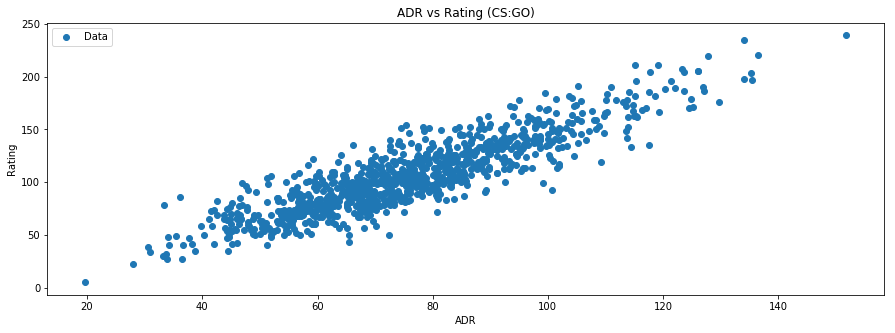

In [83]:
plt.figure(figsize=(15,5)) # ploting plane size
plt.title('ADR vs Rating (CS:GO)') # plot title
plt.scatter(x=data[:,0],y=data[:,1],label ='Data') # data selection on x and y 
plt.xlabel('ADR') # x-axis labeling
plt.ylabel('Rating') # y-axis labeling
plt.legend(loc='best')
plt.show() # show

In [84]:
def SSE(m,b,data):
    
    totalError = 0.0
    
    for i in range(numInstances):
        adr = data[i,0] #Row 'i' column 'ADR'
        rating = data[i,1] #Row 'i' column 'Rating'
        
        #Predicted rating with our current fitting line
        #y = mx + b
        predict_rating = m*adr + b
        
        #Compute squared error
        squaredError = (rating - predict_rating)**2
        
        totalError += squaredError
    
    #sse = totalError/numInstances
    
    return totalError

In [85]:
#Sample data for test
#y = 5x + 10
m = 2
b = 3

sse = SSE(m,b,data)

print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

For the fitting line: y = 2x + 3
SSE: 2644260.84


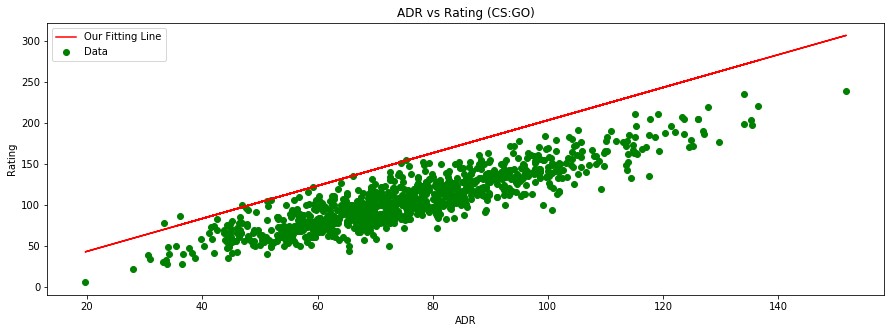

In [86]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=data[:,0],y=data[:,1],label='Data',color ='green')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
#-----------------------------------------------------------------------------
plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Our Fitting Line') # m=2 and b=3 as above module
ax.legend(loc='best')
plt.show()

In [87]:
def gredient_descent(m,b,data):
    
    N = numInstances
    m_grad = 0
    b_grad = 0
    
    for i in range(N):
        
        #Get current pair (x,y)
        x = data[i,0]
        y = data[i,1]
        
        #partial derivative respect to 'm'
        dm = -((2/N) * x * (y - (m*x + b)))
        
        #partial derivative respect to 'b'
        db = -((2/N) * (y - (m*x + b)))
        
        m_grad = m_grad + dm
        b_grad = b_grad + db
        
    m_updated = m - 0.0001*m_grad
    b_updated = b - 0.0001*b_grad
    
    '''
    Important note: The value '0.0001' that multiplies the 'm_grad' and 'b_grad' is the 'learning rate', but it's a concept
    out of the scope of this challenge. For now, just leave that there and think about it like a 'smoother' of the learn, 
    to prevent overshooting, that is, an extremly fast and uncontrolled learning.
    '''
    return m_updated,b_updated

In [88]:
#Doing just 2 steps of GD from line:
#y = 2x + 3

m = 2
b = 3

sse = SSE(m,b,data)

print('Starting line : y = %0.2fx + %0.2f - Error : %0.2f' %(m,b,sse))

for i in range(2):
    
    m,b = gredient_descent(m,b,data)
    sse = SSE(m,b,data)
    print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))
    
print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

Starting line : y = 2.00x + 3.00 - Error : 2644260.84
At step 1 - Line: y = 1.24x + 2.99 - Error: 392986.89
At step 2 - Line: y = 1.41x + 2.99 - Error: 280130.02

Best  line: y = 1.41x + 2.99 - Error: 280130.02


In [89]:
def gredient_descent_repeat(m_starting,b_starting,data,steps):
    
    sse = SSE(m_starting,b_starting,data)
    print('Starting line: y = %.6fx + %.6f - Error: %.6f\n' %(m_starting,b_starting,sse))
    
    m = m_starting
    b = b_starting
    
    display_freq = steps
    
    for i in range(display_freq):
        m,b = gredient_descent(m,b,data)
        
        if(i % display_freq == 0):
            sse = SSE(m,b,data)
            print('At step %d - Line: y = %.6fx + %.6f - Error: %.6f' %(i+1,m,b,sse))
    
    print('\nBest  line: y = %.6fx + %.6f - Error: %.6f' %(m,b,sse))
    return m,b

In [90]:
M_STARTING = 0
B_STARTING = 0
NUM_STEPS = 1000

m_best,b_best = gredient_descent_repeat(M_STARTING,B_STARTING,data,NUM_STEPS)

Starting line: y = 0.000000x + 0.000000 - Error: 12515672.000000

At step 1 - Line: y = 1.731325x + 0.021283 - Error: 882127.484132

Best  line: y = 1.416873x + -0.165913 - Error: 882127.484132


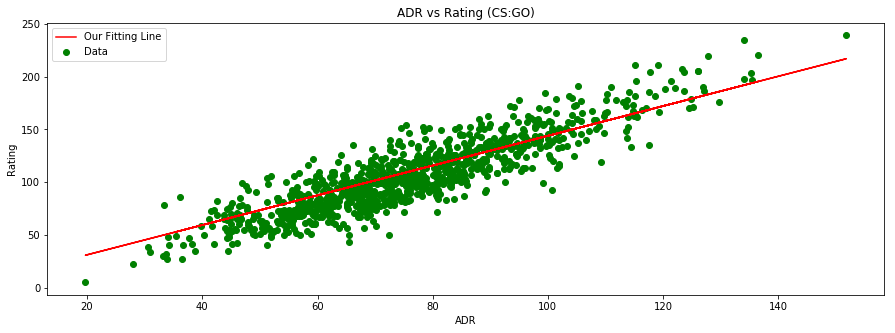

In [91]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=data[:,0],y=data[:,1],label='Data',color ='green')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
#-----------------------------------------------------------------------------
plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Our Fitting Line') 
ax.legend(loc='best')
plt.show()

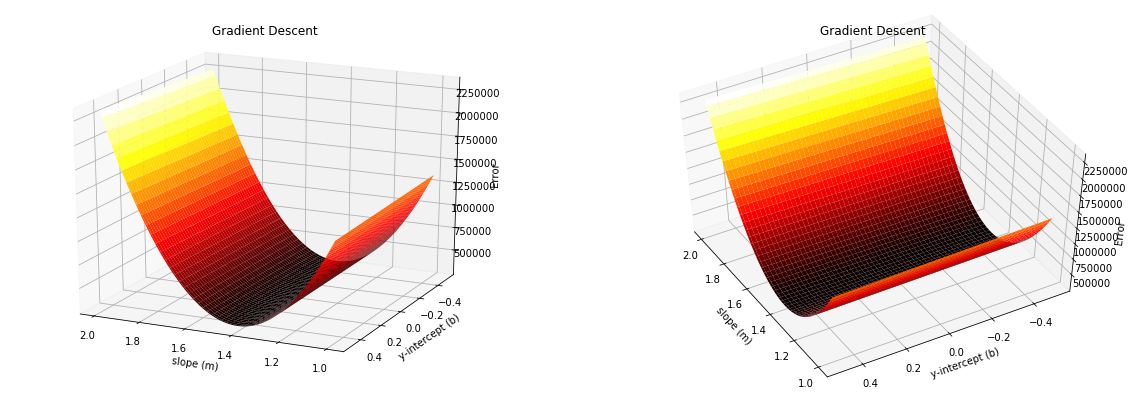

In [92]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

def error(x, y):
    return SSE(x,y,data)

m = np.arange(1,2,0.01)
b = np.arange(-0.5,0.5,0.01)


fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=20.0, azim=115)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,cmap='hot')

ax.set_title('Gradient Descent')
ax.set_xlabel('slope (m)')
ax.set_ylabel('y-intercept (b)')
ax.set_zlabel('Error')

#PLOT2
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=50.0, azim=150)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax2.plot_surface(X, Y, Z,cmap='hot')

ax2.set_title('Gradient Descent')
ax2.set_xlabel('slope (m)')
ax2.set_ylabel('y-intercept (b)')
ax2.set_zlabel('Error')


plt.show()